In [62]:
import pandas as pd
import tensorflow as tf
import os
import numpy as np


In [63]:
cal = pd.read_csv('./temperature_precipitation_data/dm_export_20011222_20211222 (4).csv')

In [64]:
cal.tail(20)

,MapDate,Region,None,D0,D1,D2,D3,D4,ValidStart,ValidEnd,StatisticFormatID,ClimateDivisionsID
1024,20020430,Northeast Inter. Basins,74.98,11.85,13.17,0.00,0.00,0.0,2002-04-30,2002-05-06,2,403
1025,20020423,Northeast Inter. Basins,73.58,14.24,12.18,0.00,0.00,0.0,2002-04-23,2002-04-29,2,403
1026,20020416,Northeast Inter. Basins,72.12,13.38,14.49,0.00,0.00,0.0,2002-04-16,2002-04-22,2,403
1027,20020409,Northeast Inter. Basins,75.28,15.37,9.35,0.00,0.00,0.0,2002-04-09,2002-04-15,2,403
1028,20020402,Northeast Inter. Basins,74.60,20.57,4.83,0.00,0.00,0.0,2002-04-02,2002-04-08,2,403
1029,20020326,Northeast Inter. Basins,70.93,28.92,0.15,0.00,0.00,0.0,2002-03-26,2002-04-01,2,403
1030,20020319,Northeast Inter. Basins,73.59,26.41,0.00,0.00,0.00,0.0,2002-03-19,2002-03-25,2,403
1031,20020312,Northeast Inter. Basins,71.63,27.75,0.62,0.00,0.00,0.0,2002-03-12,2002-03-18,2,403
1032,20020305,Northeast Inter. Basins,53.82,44.46,1.72,0.00,0.00,0.0,2002-03-05,2002-03-11,2,403
1033,20020226,Northeast Inter. Basins,59.18,40.34,0.48,0.00,0.00,0.0,2002-02-26,2002-03-04,2,403


In [65]:
cal['percent_area_severe_drought'] = cal['D2']+cal['D3']+cal['D4']

In [66]:
cal['percent_area_minimal_drought'] = cal['None']+cal['D0']+cal['D1']

In [67]:
cal['percent_area_no_drought'] = cal['None']

In [68]:
cal['percent_in_drought'] = cal['D2']+cal['D3']+cal['D4']+cal['D0']+cal['D1']

In [69]:
cal.head(3)

,MapDate,Region,None,D0,D1,D2,D3,D4,ValidStart,ValidEnd,StatisticFormatID,ClimateDivisionsID,percent_area_severe_drought,percent_area_minimal_drought,percent_area_no_drought,percent_in_drought
0,20211214,Northeast Inter. Basins,0.0,0.0,0.0,47.85,49.77,2.38,2021-12-14,2021-12-20,2,403,100.0,0.0,0.0,100.0
1,20211207,Northeast Inter. Basins,0.0,0.0,0.0,47.85,49.77,2.38,2021-12-07,2021-12-13,2,403,100.0,0.0,0.0,100.0
2,20211130,Northeast Inter. Basins,0.0,0.0,0.0,47.85,49.77,2.38,2021-11-30,2021-12-06,2,403,100.0,0.0,0.0,100.0


In [70]:
cal['percent_area_severe_drought'].mean()

35.728333333333254

In [71]:
cal['is_severe'] = cal['percent_area_severe_drought']

In [72]:
for i in cal['is_severe']:
    if i == 0:
        cal['is_severe'].replace({i: 0}, inplace=True)
    else:
        cal['is_severe'].replace({i: 1}, inplace=True)

In [73]:
cal['is_severe'].value_counts(normalize=True)

1.0    0.606322
0.0    0.393678
Name: is_severe, dtype: float64

In [74]:
cal['ValidStart'] = pd.to_datetime(cal['ValidStart'])

In [75]:
cal.sort_values(by=['ValidStart'], inplace=True)

In [76]:
cal.head(3)

,MapDate,Region,None,D0,D1,D2,D3,D4,ValidStart,ValidEnd,StatisticFormatID,ClimateDivisionsID,percent_area_severe_drought,percent_area_minimal_drought,percent_area_no_drought,percent_in_drought,is_severe
1043,20011218,Northeast Inter. Basins,0.0,0.00,0.0,52.52,47.48,0.0,2001-12-18,2001-12-24,2,403,100.00,0.00,0.0,100.0,1.0
1042,20011225,Northeast Inter. Basins,0.0,0.00,0.6,99.40,0.00,0.0,2001-12-25,2001-12-31,2,403,99.40,0.60,0.0,100.0,1.0
1041,20020101,Northeast Inter. Basins,0.0,1.54,43.8,54.66,0.00,0.0,2002-01-01,2002-01-07,2,403,54.66,45.34,0.0,100.0,1.0


In [77]:
cal.shape

(1044, 17)

In [78]:
cal.index = pd.to_datetime(cal['ValidStart'])

In [79]:
cal.head()

,MapDate,Region,None,D0,D1,D2,D3,D4,ValidStart,ValidEnd,StatisticFormatID,ClimateDivisionsID,percent_area_severe_drought,percent_area_minimal_drought,percent_area_no_drought,percent_in_drought,is_severe
ValidStart,,,,,,,,,,,,,,,,,
2001-12-18,20011218,Northeast Inter. Basins,0.00,0.00,0.00,52.52,47.48,0.0,2001-12-18,2001-12-24,2,403,100.00,0.00,0.00,100.00,1.0
2001-12-25,20011225,Northeast Inter. Basins,0.00,0.00,0.60,99.40,0.00,0.0,2001-12-25,2001-12-31,2,403,99.40,0.60,0.00,100.00,1.0
2002-01-01,20020101,Northeast Inter. Basins,0.00,1.54,43.80,54.66,0.00,0.0,2002-01-01,2002-01-07,2,403,54.66,45.34,0.00,100.00,1.0
2002-01-08,20020108,Northeast Inter. Basins,57.62,41.73,0.65,0.00,0.00,0.0,2002-01-08,2002-01-14,2,403,0.00,100.00,57.62,42.38,0.0
2002-01-15,20020115,Northeast Inter. Basins,53.87,43.79,2.34,0.00,0.00,0.0,2002-01-15,2002-01-21,2,403,0.00,100.00,53.87,46.13,0.0


In [102]:
cal.isna().sum()

MapDate                         0
Region                          0
None                            0
D0                              0
D1                              0
D2                              0
D3                              0
D4                              0
ValidStart                      0
ValidEnd                        0
StatisticFormatID               0
ClimateDivisionsID              0
percent_area_severe_drought     0
percent_area_minimal_drought    0
percent_area_no_drought         0
percent_in_drought              0
is_severe                       0
dtype: int64

<AxesSubplot:xlabel='ValidStart'>

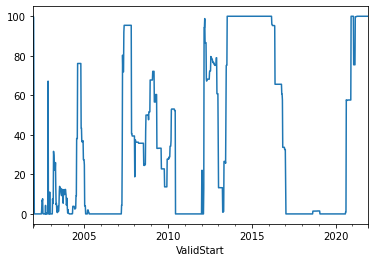

In [80]:
area_severe = cal['percent_area_severe_drought']
area_severe.plot()

<AxesSubplot:xlabel='ValidStart'>

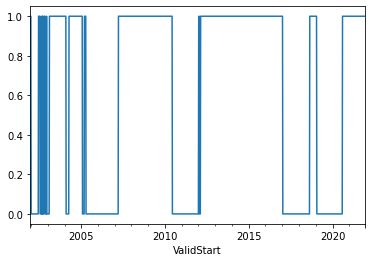

In [81]:
area_in_drought = cal['is_severe']
area_in_drought.plot()

<AxesSubplot:xlabel='ValidStart'>

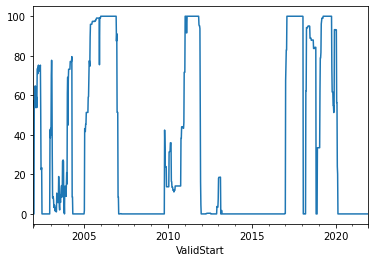

In [83]:
area_no_drought = cal['percent_area_no_drought']
area_no_drought.plot()

<AxesSubplot:xlabel='ValidStart'>

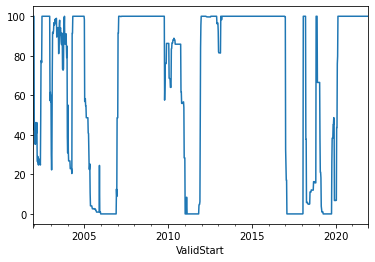

In [88]:
area_in_drought = cal['percent_in_drought']
area_in_drought.plot()

In [86]:
def df_to_X_y(df, windowsize=5):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-windowsize):
        row = [[a] for a in df_as_np[i:i+5]]
        X.append(row)
        label = df_as_np[i+5]
        y.append(label)
    return np.array(X), np.array(y)


In [89]:
WINDOW_SIZE = 5
X, y = df_to_X_y(area_in_drought, WINDOW_SIZE)
X.shape, y.shape


((1039, 5, 1), (1039,))

In [139]:
X_train, y_train = X[:800], y[:800]
X_val, y_val = X[800:900], y[800:900]
X_test, y_test = X[900:], y[900:]

In [140]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5,1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))
model1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 64)                16896     
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 520       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 9         
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [141]:
cp = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer = Adam(learning_rate=0.0005), metrics=[RootMeanSquaredError()])


In [142]:
model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp])

Epoch 1/10
25/25 [==============================] - 3s 31ms/step - loss: 6751.0898 - root_mean_squared_error: 82.1650 - val_loss: 1561.5381 - val_root_mean_squared_error: 39.5163


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 2/10
25/25 [==============================] - 0s 8ms/step - loss: 6568.1343 - root_mean_squared_error: 81.0440 - val_loss: 1495.8453 - val_root_mean_squared_error: 38.6762


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 3/10
25/25 [==============================] - 0s 8ms/step - loss: 6316.6025 - root_mean_squared_error: 79.4771 - val_loss: 1410.7979 - val_root_mean_squared_error: 37.5606


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 4/10
25/25 [==============================] - 0s 7ms/step - loss: 5928.7539 - root_mean_squared_error: 76.9984 - val_loss: 1301.9326 - val_root_mean_squared_error: 36.0823


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 5/10
25/25 [==============================] - 0s 8ms/step - loss: 5409.2031 - root_mean_squared_error: 73.5473 - val_loss: 1165.8336 - val_root_mean_squared_error: 34.1443


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 6/10
25/25 [==============================] - 0s 7ms/step - loss: 4751.3652 - root_mean_squared_error: 68.9301 - val_loss: 1030.3811 - val_root_mean_squared_error: 32.0995


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 7/10
25/25 [==============================] - 0s 7ms/step - loss: 4162.0996 - root_mean_squared_error: 64.5143 - val_loss: 929.8128 - val_root_mean_squared_error: 30.4928


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 8/10
25/25 [==============================] - 0s 7ms/step - loss: 3742.2432 - root_mean_squared_error: 61.1739 - val_loss: 857.1981 - val_root_mean_squared_error: 29.2779


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 9/10
25/25 [==============================] - 0s 7ms/step - loss: 3371.8682 - root_mean_squared_error: 58.0678 - val_loss: 791.0438 - val_root_mean_squared_error: 28.1255


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 10/10
25/25 [==============================] - 0s 7ms/step - loss: 3034.7515 - root_mean_squared_error: 55.0886 - val_loss: 732.7449 - val_root_mean_squared_error: 27.0693


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


In [143]:
from tensorflow.keras.models import load_model
model1 = load_model("model1/")

In [158]:
train_predictions = model1.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals': y_train})
train_results

,Train Predictions,Actuals
0,34.634808,35.33
1,34.494301,42.14
2,34.588299,35.39
3,34.477261,46.26
4,34.618855,41.59
...,...,...
795,0.489038,0.00
796,0.489038,0.00
797,0.489038,0.00
798,0.489038,0.00


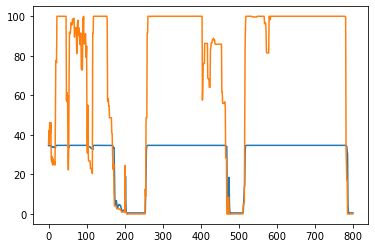

In [162]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'])
plt.plot(train_results['Actuals'])

In [153]:
val_predictions = model1.predict(X_val).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals': y_val})
val_results

,Val Predictions,Actuals
0,0.489038,0.00
1,0.489038,0.00
2,0.489038,0.00
3,0.489038,0.00
4,0.489038,0.00
...,...,...
95,0.946361,1.03
96,0.403556,1.03
97,0.846121,1.03
98,1.581193,0.00


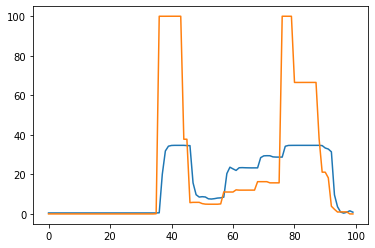

In [161]:
plt.plot(val_results['Val Predictions'][:100])
plt.plot(val_results['Actuals'][:100])

In [155]:
test_predictions = model1.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions':val_predictions, 'Actuals': y_val})
test_results

,Test Predictions,Actuals
0,0.489038,0.00
1,0.489038,0.00
2,0.489038,0.00
3,0.489038,0.00
4,0.489038,0.00
...,...,...
95,0.946361,1.03
96,0.403556,1.03
97,0.846121,1.03
98,1.581193,0.00


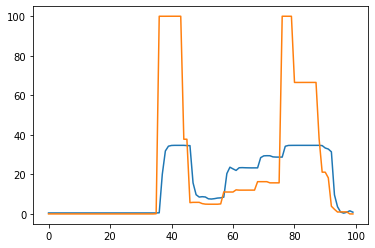

In [156]:
plt.plot(test_results['Test Predictions'][:100])
plt.plot(test_results['Actuals'][:100])